# Cross Selling Recommendation Project

### Bilgan Kiris 
### November 24th, 2024

  <h3 style="padding: 10px; background-color: #eaffea">Problem Description</h3>

XYZ Credit Union in Latin America excels in selling individual banking products (e.g., credit
cards, deposit accounts, retirement accounts). However, their customers rarely purchase
multiple products, indicating low cross-selling performance. This project aims to analyze
customer data and recommend actionable strategies to improve cross-selling for their products

<h3 style="padding: 10px; background-color: #eaffea; font-size: 16px;">Step 1: Load and Inspect the Data</h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the dataset
file_path = "Test.csv"
df = pd.read_csv(file_path)

# overview
df.info()
df.head()

C:\Users\bilga\AppData\Local\Temp\ipykernel_12028\1117014075.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929615 entries, 0 to 929614
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha_dato             929615 non-null  object 
 1   ncodpers               929615 non-null  int64  
 2   ind_empleado           929615 non-null  object 
 3   pais_residencia        929615 non-null  object 
 4   sexo                   929610 non-null  object 
 5   age                    929615 non-null  int64  
 6   fecha_alta             929615 non-null  object 
 7   ind_nuevo              929615 non-null  int64  
 8   antiguedad             929615 non-null  int64  
 9   indrel                 929615 non-null  int64  
 10  ult_fec_cli_1t         1683 non-null    object 
 11  indrel_1mes            929592 non-null  float64
 12  tiprel_1mes            929592 non-null  object 
 13  indresi                929615 non-null  object 
 14  indext                 929615 non-nu

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2016-06-28,15889,F,ES,V,56,1995-01-16,0,256,1,...,N,N,KAT,N,1,28.0,MADRID,1,326124.90,01 - TOP
1,2016-06-28,1170544,N,ES,H,36,2013-08-28,0,34,1,...,N,NaN,KAT,N,1,3.0,ALICANTE,0,NA,02 - PARTICULARES
2,2016-06-28,1170545,N,ES,V,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,15.0,"CORUÑA, A",1,NA,03 - UNIVERSITARIO
3,2016-06-28,1170547,N,ES,H,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,8.0,BARCELONA,0,148402.98,03 - UNIVERSITARIO
4,2016-06-28,1170548,N,ES,H,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,7.0,"BALEARS, ILLES",0,106885.80,03 - UNIVERSITARIO


<h3 style="padding: 10px; background-color: #eaffea; font-size: 16px;">Step 2: Identify Missing Values</h3>

In [4]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# display
print ("Missing Values: \n", missing_values[missing_values > 0])
print ("Missing Percenatge: \n", missing_percentage[missing_percentage > 0])

Missing Values: 
 sexo                   5
ult_fec_cli_1t    927932
indrel_1mes           23
tiprel_1mes           23
conyuemp          929511
canal_entrada       2081
cod_prov            3996
nomprov             3996
segmento            2248
dtype: int64
Missing Percenatge: 
 sexo               0.000538
ult_fec_cli_1t    99.818957
indrel_1mes        0.002474
tiprel_1mes        0.002474
conyuemp          99.988813
canal_entrada      0.223856
cod_prov           0.429855
nomprov            0.429855
segmento           0.241821
dtype: float64


<h3 style="padding: 10px; background-color: #eaffea; font-size: 16px;">Step 3: Handle Missing Values</h3>

In [5]:
# handle missing numerical values by median imputation for income
# remove extra spaces 
df['renta'] = df['renta'].str.strip()

# replace non-numeric entries like 'NA' to 'NaN'
df['renta'] = df['renta'].replace('NA', np.nan)

# convert the columns to numeric 
df['renta'] = pd.to_numeric(df['renta'], errors = 'coerce')

df['renta'] = df['renta'].fillna(df['renta'].median())

# handle missing categorical values by most frequent category
df['segmento'] = df['segmento'].fillna(df['segmento'].mode()[0])

# dropping irrelevant columns
df = df.drop(columns=['ult_fec_cli_1t'], errors='ignore')

<h3 style="padding: 10px; background-color: #eaffea; font-size: 16px;">Step 4: Detect and Treat Outliers</h3>

In [6]:
# defining a function to cap outliers
def cap_outliers(series, lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = series.quantile(lower_percentile)
    upper_bound = series.quantile(upper_percentile)
    return np.clip(series, lower_bound, upper_bound)

# apply the function to columns like 'age' and 'renta'
df['age'] = cap_outliers(df['age'])
df['renta'] = cap_outliers(df['renta'])

<h3 style="padding: 10px; background-color: #eaffea; font-size: 16px;">Step 5: Address Skewness</h3>

In [7]:
# apply log transformation to 'renta'
df['renta_log'] = np.log1p(df['renta'])

<h3 style="padding: 10px; background-color: #eaffea; font-size: 16px;">Step 6: Clean Up Categorial Data</h3>

In [8]:
# standardize 'sexo' column
df['sexo'] = df['sexo'].replace({'H': 'Male', 'V': 'Female'})

# group rare categories in 'segmento'
df['segmento'] = df['segmento'].replace({'03 - college graduated': 'Others'})

<h3 style="padding: 10px; background-color: #eaffea; font-size: 16px;">Step 7: Remove Duplicates</h3>

In [9]:
# drop duplicates based on 'ncodpers'
df = df.drop_duplicates(subset='ncodpers')

In [10]:
# Check for any remaining missing values
remaining_missing_values = df.isnull().sum()
print("Remaining Missing Values:\n", remaining_missing_values[remaining_missing_values > 0])

# Check if the dataset is completely clean
if remaining_missing_values.sum() == 0:
    print("No missing values remain!")
else:
    print("Remaining missing values still need attention.")


Remaining Missing Values:
 sexo                  5
indrel_1mes          23
tiprel_1mes          23
conyuemp         929511
canal_entrada      2081
cod_prov           3996
nomprov            3996
dtype: int64
Remaining missing values still need attention.


<h3 style="padding: 10px; background-color: #eaffea; font-size: 16px;">Step 8: Missing Value Fixes</h3>

In [11]:
# since gender only has 5 missing values, we can impute using the mode (most frequent value)
df['sexo'] = df['sexo'].fillna(df['sexo'].mode()[0])


In [12]:
# 'indrel_1mes' and 'tiprel_1mes'
# both have 23 missing values each, so using mode imputation since it's the most straightforward choice for categorical data.
df['indrel_1mes'] = df['indrel_1mes'].fillna(df['indrel_1mes'].mode()[0])
df['tiprel_1mes'] = df['tiprel_1mes'].fillna(df['tiprel_1mes'].mode()[0])

In [13]:
# conyuemp column has 929,511 missing values, this might not be useful for analysis. Hence we will drop it
df = df.drop(columns=['conyuemp'])

In [14]:
# canal_entrada has 2,081 missing values, hence imputing the mode as it's categorical and likely has a dominant value
df['canal_entrada'] = df['canal_entrada'].fillna(df['canal_entrada'].mode()[0])

In [15]:
# Create a mapping dictionary for cod_prov -> nomprov using known data (drop NA values in cod_prov)
province_mapping = df[['cod_prov', 'nomprov']].dropna().drop_duplicates().set_index('cod_prov')['nomprov']

# Show a sample to confirm the mapping looks good
print(province_mapping.head())


cod_prov
28.0            MADRID
3.0           ALICANTE
15.0         CORUÑA, A
8.0          BARCELONA
7.0     BALEARS, ILLES
Name: nomprov, dtype: object


In [16]:
# Fill missing 'nomprov' values based on the 'cod_prov' using the mapping
df['nomprov'] = df['cod_prov'].map(province_mapping)

# In case any values still remain missing (perhaps due to missing cod_prov), we’ll impute them with the most common 'nomprov'
df['nomprov'] = df['nomprov'].fillna(df['nomprov'].mode()[0])
df['cod_prov'] = df['cod_prov'].fillna(df['cod_prov'].mode()[0])


# Check if there are still any missing values after this
remaining_missing_values = df.isnull().sum()
print("Remaining Missing Values after imputation:\n", remaining_missing_values[remaining_missing_values > 0])


Remaining Missing Values after imputation:
 Series([], dtype: int64)


In [17]:
print(df.isnull().sum())
print("No missing values remain.")

fecha_dato               0
ncodpers                 0
ind_empleado             0
pais_residencia          0
sexo                     0
age                      0
fecha_alta               0
ind_nuevo                0
antiguedad               0
indrel                   0
indrel_1mes              0
tiprel_1mes              0
indresi                  0
indext                   0
canal_entrada            0
indfall                  0
tipodom                  0
cod_prov                 0
nomprov                  0
ind_actividad_cliente    0
renta                    0
segmento                 0
renta_log                0
dtype: int64
No missing values remain.


<h3 style="padding: 10px; background-color: #eaffea; font-size: 16px;">Step 9: Outlier Detection and Skewness Check</h3>

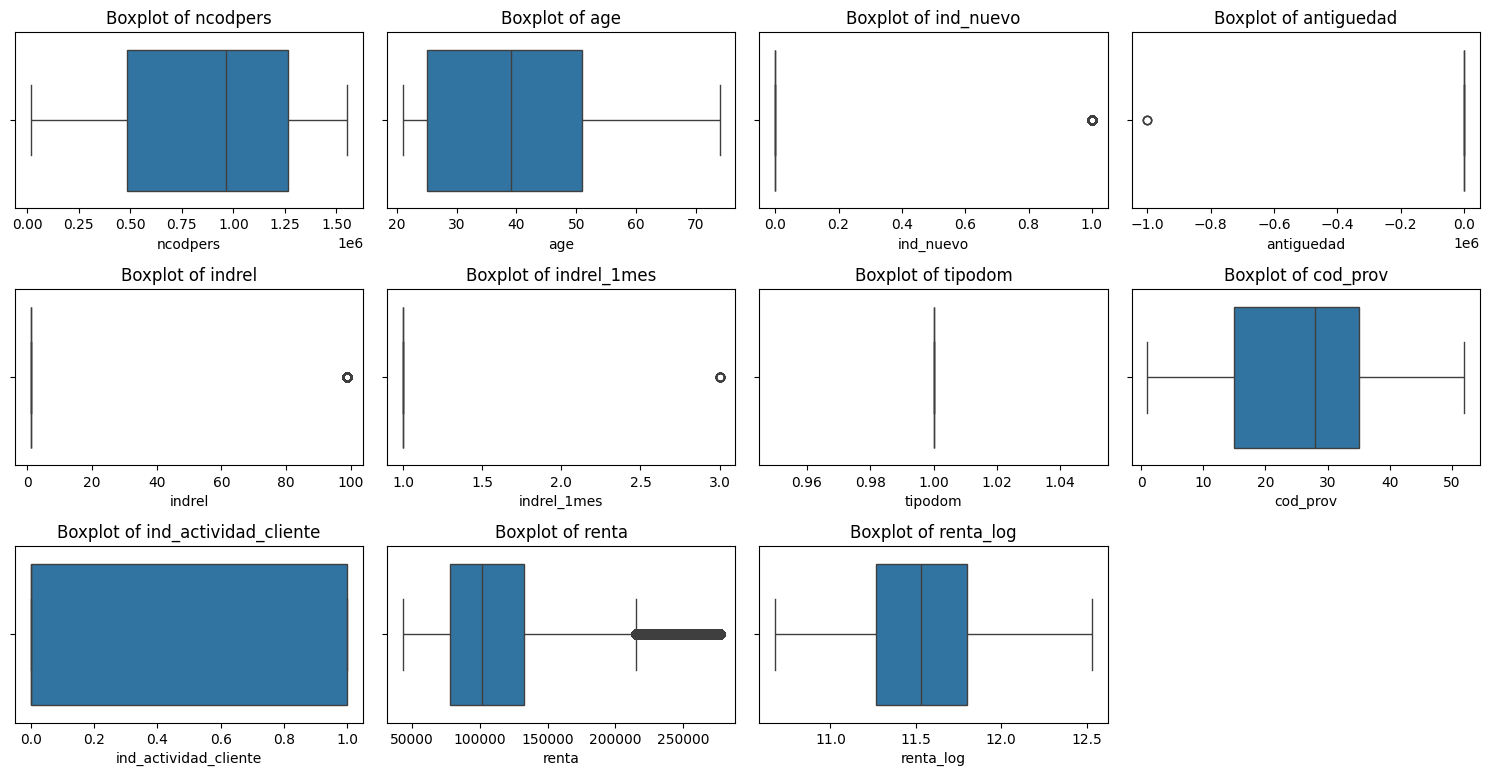

In [18]:
# Create boxplots for numerical columns to detect outliers
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)  # Adjust the layout based on number of columns
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [19]:
# Calculate skewness for each numerical column
skewness = df[numerical_columns].skew()

# Print skewness values to check
print("Skewness of numerical columns:\n", skewness)


Skewness of numerical columns:
 ncodpers                  -0.327419
age                        0.580327
ind_nuevo                  5.739031
antiguedad              -555.491690
indrel                    23.438419
indrel_1mes              185.545941
tipodom                    0.000000
cod_prov                  -0.126283
ind_actividad_cliente      0.302309
renta                      1.324386
renta_log                  0.217025
dtype: float64


In [20]:
# Apply log transformation to positively skewed columns
df['age_log'] = np.log1p(df['age'])
df['renta_log'] = np.log1p(df['renta'])
df['ind_nuevo_log'] = np.log1p(df['ind_nuevo'])
df['indrel_log'] = np.log1p(df['indrel'])
df['indrel_1mes_log'] = np.log1p(df['indrel_1mes'])


In [21]:
# Check for extreme values
print(df['antiguedad'].describe())


count    929615.000000
mean         77.728413
std        1797.824518
min     -999999.000000
25%          23.000000
50%          55.000000
75%         136.000000
max         257.000000
Name: antiguedad, dtype: float64


In [22]:
# Replace -999999 with NaN, then fill NaN with the median or a sensible value
df['antiguedad'] = df['antiguedad'].replace(-999999, np.nan)

# Fill NaN values with the median of 'antiguedad'
df['antiguedad'] = df['antiguedad'].fillna(df['antiguedad'].median())

# Summary after handling outliers
print(df['antiguedad'].describe())


count    929615.000000
mean         80.955730
std          67.241709
min           0.000000
25%          23.000000
50%          55.000000
75%         136.000000
max         257.000000
Name: antiguedad, dtype: float64


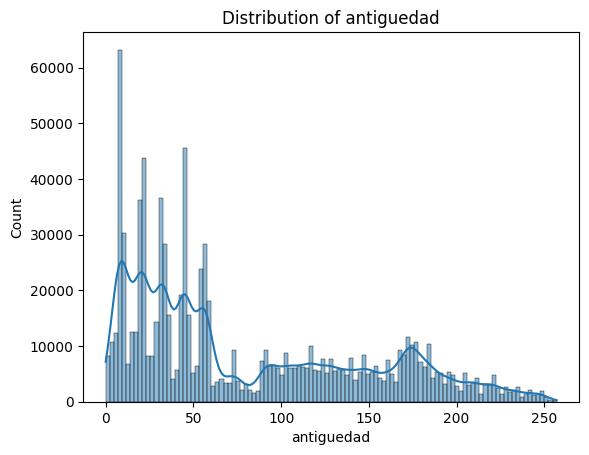

In [23]:
# Plot the distribution of antiguedad to check for outliers visually
sns.histplot(df['antiguedad'], kde=True)
plt.title('Distribution of antiguedad')
plt.show()


In [24]:
# Check percentiles of antiguedad
print(df['antiguedad'].quantile([0.25, 0.5, 0.75, 0.95, 1]))


0.25     23.0
0.50     55.0
0.75    136.0
0.95    207.0
1.00    257.0
Name: antiguedad, dtype: float64


<h3 style="padding: 10px; background-color: #eaffea; font-size: 16px;">Step 10: NLP Cleaning and Featurization</h3>

In [31]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
# Remove the numeric prefix using regex
df['segmento_clean'] = df['segmento'].str.extract(r'[-\s](.*)$')[0]
print(df['segmento_clean'].value_counts())

segmento_clean
- PARTICULARES     547626
- UNIVERSITARIO    346028
- TOP               35961
Name: count, dtype: int64


In [33]:
# Converting the cleaned categories into numerical values using label encoding 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['segmento_encoded'] = label_encoder.fit_transform(df['segmento_clean'])
print(label_encoder.classes_)  # To see the mapping


['- PARTICULARES' '- TOP' '- UNIVERSITARIO']


In [34]:
# after cleaning and encoding, analyze the distribution of customer segments
print(df['segmento_clean'].value_counts())


segmento_clean
- PARTICULARES     547626
- UNIVERSITARIO    346028
- TOP               35961
Name: count, dtype: int64


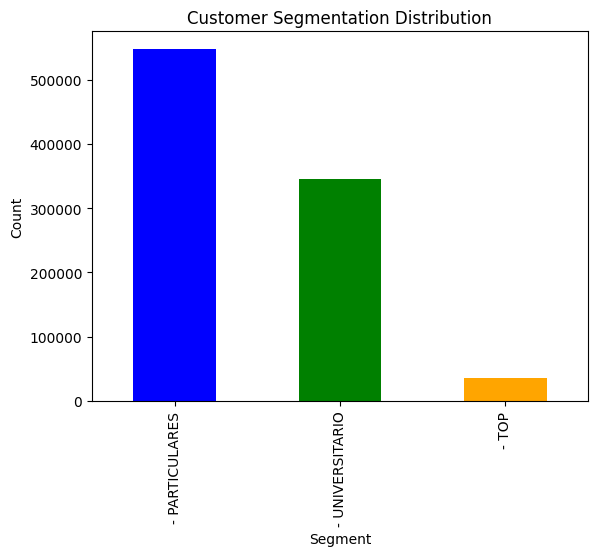

In [35]:
# Visualizing the distribution of segmento_clean to understand customer segmentation

df['segmento_clean'].value_counts().plot(kind='bar', color=['blue', 'green', 'orange'])
plt.title('Customer Segmentation Distribution')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

In [36]:
df.groupby('segmento_clean')['renta'].mean()
df.groupby('segmento_clean')['age'].mean()

segmento_clean
- PARTICULARES     48.690535
- TOP              54.648063
- UNIVERSITARIO    24.469627
Name: age, dtype: float64

C:\Users\bilga\AppData\Local\Temp\ipykernel_12028\2244227885.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='segmento_clean', y='age', palette='Set2')


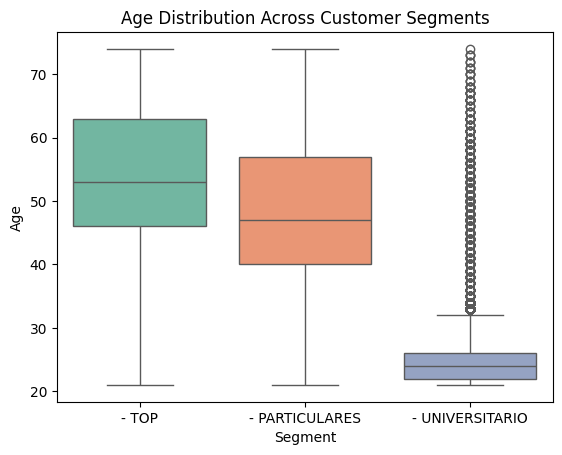

In [37]:
# variation of ages
sns.boxplot(data=df, x='segmento_clean', y='age', palette='Set2')
plt.title('Age Distribution Across Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Age')
plt.show()

In [38]:
# Applying Standardization
# using z-scores to identify and handle extreme outliers
from scipy.stats import zscore

df['renta_zscore'] = zscore(df['renta'])
df_outliers_removed = df[(df['renta_zscore'] > -3) & (df['renta_zscore'] < 3)]


In [41]:
print("Original dataset size:", len(df))
print("Filtered dataset size:", len(df_outliers_removed))
print("Number of rows removed:", len(df) - len(df_outliers_removed))


Original dataset size: 929615
Filtered dataset size: 929615
Number of rows removed: 0


In [44]:
# Check the range of z-scores
print("Z-scores range:", df['renta_zscore'].min(), "to", df['renta_zscore'].max())


Z-scores range: -1.2283899617598286 to 2.7176503648128776
